## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
c:\users\henry\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\henry\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\henry\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [4]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [5]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
"""
Compile 模型
"""

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 18s 359us/step - loss: 1.9302 - acc: 0.3030 - val_loss: 1.8120 - val_acc: 0.3532
Epoch 2/500
50000/50000 [==============================] - 17s 335us/step - loss: 1.7075 - acc: 0.3879 - val_loss: 1.6607 - val_acc: 0.4192
Epoch 3/500
50000/50000 [==============================] - 17s 344us/step - loss: 1.6202 - acc: 0.4197 - val_loss: 1.5879 - val_acc: 0.4388
Epoch 4/500
50000/50000 [==============================] - 18s 358us/step - loss: 1.5482 - acc: 0.4487 - val_loss: 1.5512 - val_acc: 0.4460
Epoch 5/500
50000/50000 [==============================] - 14s 279us/step - loss: 1.4986 - acc: 0.4655 - val_loss: 1.5310 - val_acc: 0.4498
Epoch 6/500
50000/50000 [==============================] - 10s 191us/step - loss: 1.4588 - acc: 0.4812 - val_loss: 1.4624 - val_acc: 0.4842
Epoch 7/500
50000/50000 [==============================] - 16s

50000/50000 [==============================] - 19s 375us/step - loss: 0.5460 - acc: 0.8047 - val_loss: 1.9541 - val_acc: 0.5146
Epoch 57/500
50000/50000 [==============================] - 19s 378us/step - loss: 0.5509 - acc: 0.7993 - val_loss: 1.9732 - val_acc: 0.5196
Epoch 58/500
50000/50000 [==============================] - 18s 365us/step - loss: 0.5196 - acc: 0.8133 - val_loss: 2.0709 - val_acc: 0.5054
Epoch 59/500
50000/50000 [==============================] - 19s 377us/step - loss: 0.5211 - acc: 0.8127 - val_loss: 2.0429 - val_acc: 0.5124
Epoch 60/500
50000/50000 [==============================] - 19s 377us/step - loss: 0.5031 - acc: 0.8199 - val_loss: 2.0624 - val_acc: 0.5212
Epoch 61/500
50000/50000 [==============================] - 18s 368us/step - loss: 0.4944 - acc: 0.8229 - val_loss: 2.1116 - val_acc: 0.5113
Epoch 62/500
50000/50000 [==============================] - 19s 372us/step - loss: 0.4900 - acc: 0.8242 - val_loss: 2.0681 - val_acc: 0.5144
Epoch 63/500
50000/50000 [

50000/50000 [==============================] - 10s 195us/step - loss: 0.2238 - acc: 0.9200 - val_loss: 3.3812 - val_acc: 0.5081
Epoch 115/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.2437 - acc: 0.9136 - val_loss: 3.4988 - val_acc: 0.4968
Epoch 116/500
50000/50000 [==============================] - 9s 190us/step - loss: 0.2991 - acc: 0.8933 - val_loss: 3.4539 - val_acc: 0.4955
Epoch 117/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.2300 - acc: 0.9170 - val_loss: 3.4699 - val_acc: 0.5061
Epoch 118/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.2176 - acc: 0.9227 - val_loss: 3.4342 - val_acc: 0.5006
Epoch 119/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.2106 - acc: 0.9241 - val_loss: 3.4367 - val_acc: 0.4950
Epoch 120/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.2355 - acc: 0.9158 - val_loss: 3.5105 - val_acc: 0.5062
Epoch 121/500
50000/50

50000/50000 [==============================] - 16s 329us/step - loss: 0.1794 - acc: 0.9369 - val_loss: 4.1039 - val_acc: 0.5025- loss: 0.1793 - ETA: 0s - loss: 0.1799 - acc
Epoch 171/500
50000/50000 [==============================] - 17s 347us/step - loss: 0.1487 - acc: 0.9467 - val_loss: 4.1344 - val_acc: 0.4969
Epoch 172/500
50000/50000 [==============================] - 17s 337us/step - loss: 0.1869 - acc: 0.9337 - val_loss: 4.1550 - val_acc: 0.4993
Epoch 173/500
50000/50000 [==============================] - 17s 337us/step - loss: 0.2024 - acc: 0.9305 - val_loss: 4.1097 - val_acc: 0.4942
Epoch 174/500
50000/50000 [==============================] - 17s 335us/step - loss: 0.1543 - acc: 0.9458 - val_loss: 4.2037 - val_acc: 0.4975
Epoch 175/500
50000/50000 [==============================] - 16s 326us/step - loss: 0.0962 - acc: 0.9668 - val_loss: 4.1925 - val_acc: 0.5049
Epoch 176/500
50000/50000 [==============================] - 17s 331us/step - loss: 0.0873 - acc: 0.9691 - val_loss: 

50000/50000 [==============================] - 16s 322us/step - loss: 0.1447 - acc: 0.9500 - val_loss: 4.5533 - val_acc: 0.5008
Epoch 228/500
50000/50000 [==============================] - 17s 335us/step - loss: 0.0973 - acc: 0.9661 - val_loss: 4.5672 - val_acc: 0.4980
Epoch 229/500
50000/50000 [==============================] - 16s 321us/step - loss: 0.0938 - acc: 0.9673 - val_loss: 4.7353 - val_acc: 0.4848
Epoch 230/500
50000/50000 [==============================] - 16s 329us/step - loss: 0.0997 - acc: 0.9651 - val_loss: 4.5850 - val_acc: 0.5011
Epoch 231/500
50000/50000 [==============================] - 17s 345us/step - loss: 0.1282 - acc: 0.9568 - val_loss: 4.6935 - val_acc: 0.4790
Epoch 232/500
50000/50000 [==============================] - 17s 342us/step - loss: 0.2070 - acc: 0.9323 - val_loss: 4.6016 - val_acc: 0.4937
Epoch 233/500
50000/50000 [==============================] - 16s 325us/step - loss: 0.1473 - acc: 0.9500 - val_loss: 4.7053 - val_acc: 0.4964
Epoch 234/500
50000/

50000/50000 [==============================] - 12s 250us/step - loss: 0.0311 - acc: 0.9897 - val_loss: 4.8625 - val_acc: 0.5041
Epoch 285/500
50000/50000 [==============================] - 13s 258us/step - loss: 0.0378 - acc: 0.9874 - val_loss: 4.8769 - val_acc: 0.5050
Epoch 286/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.2217 - acc: 0.9352 - val_loss: 4.8962 - val_acc: 0.4863
Epoch 287/500
50000/50000 [==============================] - 13s 265us/step - loss: 0.3084 - acc: 0.9130 - val_loss: 4.7533 - val_acc: 0.4932
Epoch 288/500
50000/50000 [==============================] - 13s 258us/step - loss: 0.1149 - acc: 0.9609 - val_loss: 4.7896 - val_acc: 0.4948
Epoch 289/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.0637 - acc: 0.9783 - val_loss: 4.7390 - val_acc: 0.5023
Epoch 290/500
50000/50000 [==============================] - 12s 243us/step - loss: 0.0461 - acc: 0.9849 - val_loss: 4.8262 - val_acc: 0.5028
Epoch 291/500
50000/

50000/50000 [==============================] - 13s 251us/step - loss: 0.3083 - acc: 0.9150 - val_loss: 5.0297 - val_acc: 0.4942
Epoch 341/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.1366 - acc: 0.9565 - val_loss: 4.9309 - val_acc: 0.5000
Epoch 342/500
50000/50000 [==============================] - 13s 255us/step - loss: 0.0459 - acc: 0.9841 - val_loss: 4.9585 - val_acc: 0.4965
Epoch 343/500
50000/50000 [==============================] - 12s 250us/step - loss: 0.0216 - acc: 0.9936 - val_loss: 5.0079 - val_acc: 0.4981
Epoch 344/500
50000/50000 [==============================] - 13s 250us/step - loss: 0.0197 - acc: 0.9946 - val_loss: 5.0070 - val_acc: 0.4997
Epoch 345/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.0307 - acc: 0.9904 - val_loss: 5.1580 - val_acc: 0.4947 - loss: 0 - ETA: 5s - ETA: 3s - loss: 0.02 - ETA: 0s - loss: 0.0297 - ac
Epoch 346/500
50000/50000 [==============================] - 13s 254us/step - loss: 0.230

50000/50000 [==============================] - 13s 260us/step - loss: 0.0284 - acc: 0.9911 - val_loss: 5.0331 - val_acc: 0.5020
Epoch 397/500
50000/50000 [==============================] - 13s 267us/step - loss: 0.0229 - acc: 0.9934 - val_loss: 5.1102 - val_acc: 0.4976
Epoch 398/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.0679 - acc: 0.9767 - val_loss: 5.0771 - val_acc: 0.4894
Epoch 399/500
50000/50000 [==============================] - 13s 254us/step - loss: 0.1528 - acc: 0.9525 - val_loss: 5.1344 - val_acc: 0.4901
Epoch 400/500
50000/50000 [==============================] - 12s 240us/step - loss: 0.1925 - acc: 0.9435 - val_loss: 5.0243 - val_acc: 0.4905
Epoch 401/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.0764 - acc: 0.9743 - val_loss: 4.9658 - val_acc: 0.5018
Epoch 402/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.0225 - acc: 0.9933 - val_loss: 5.0066 - val_acc: 0.5031
Epoch 403/500
50000/

50000/50000 [==============================] - 12s 247us/step - loss: 0.0277 - acc: 0.9920 - val_loss: 5.0692 - val_acc: 0.4982
Epoch 454/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.0281 - acc: 0.9911 - val_loss: 5.2085 - val_acc: 0.4913
Epoch 455/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.1805 - acc: 0.9457 - val_loss: 5.1319 - val_acc: 0.4848
Epoch 456/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.1478 - acc: 0.9548 - val_loss: 5.0883 - val_acc: 0.4907
Epoch 457/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.0760 - acc: 0.9742 - val_loss: 5.0867 - val_acc: 0.4984
Epoch 458/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.0370 - acc: 0.9877 - val_loss: 5.0856 - val_acc: 0.4995
Epoch 459/500
50000/50000 [==============================] - 12s 244us/step - loss: 0.0449 - acc: 0.9854 - val_loss: 5.0430 - val_acc: 0.4962
Epoch 460/500
50000/

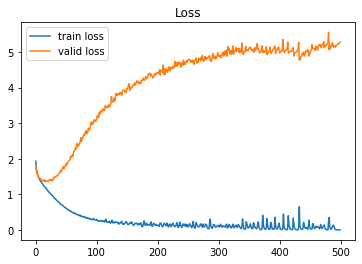

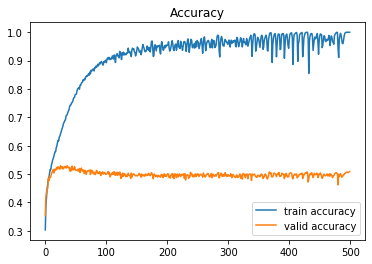

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()